#### Kleding herkennen met behulp van ML

In [24]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Data

In [25]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

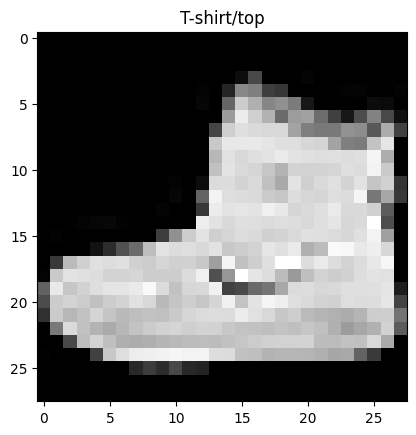

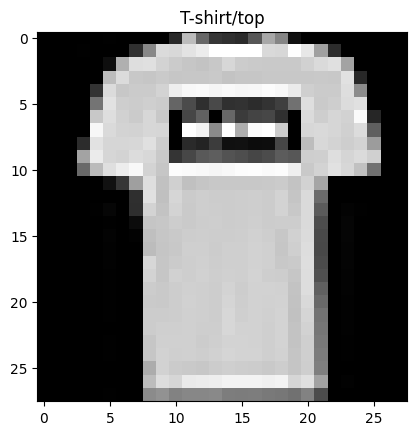

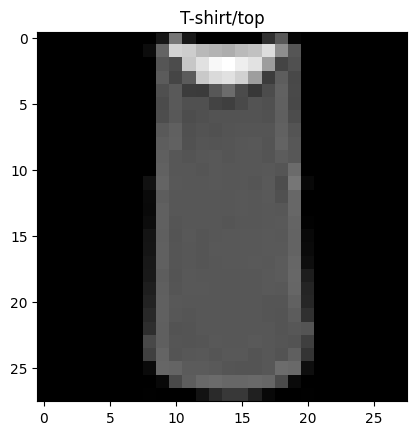

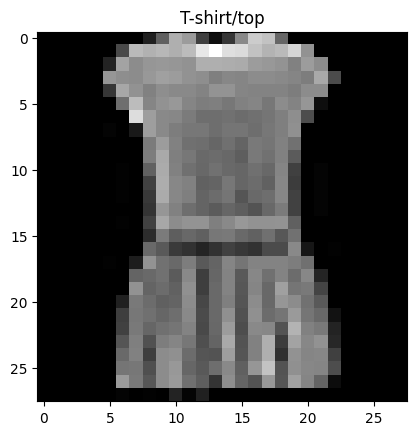

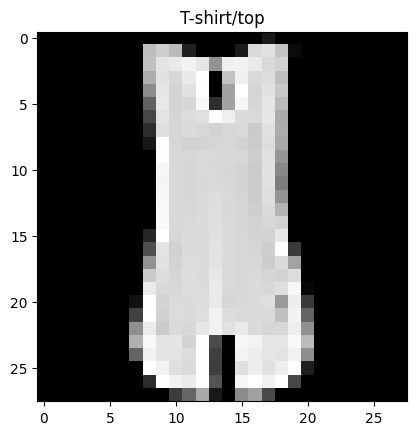

In [26]:
# Normaliseer de afbeeldingen
train_images_nor = train_images / 255.0
test_images_nor = test_images / 255.0
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Zet de labels om naar one-hot encoding
train_labels_nor = tf.keras.utils.to_categorical(train_labels, 10)
test_labels_nor = tf.keras.utils.to_categorical(test_labels, 10)

for i in range(5):
    plt.imshow(train_images[i], cmap='gray')
    plt.title(class_names[train_labels[i].argmax()])
    plt.show()

Neural network trainen

In [27]:
train_images, val_images, train_labels, val_labels = train_test_split(train_images_nor, train_labels_nor, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # 10 klassen
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train het model
model.fit(train_images, train_labels, epochs=5, validation_data=(val_images, val_labels))


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7675 - loss: 0.6737 - val_accuracy: 0.8524 - val_loss: 0.4150
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8561 - loss: 0.4004 - val_accuracy: 0.8618 - val_loss: 0.3901
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8707 - loss: 0.3514 - val_accuracy: 0.8702 - val_loss: 0.3674
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8794 - loss: 0.3264 - val_accuracy: 0.8668 - val_loss: 0.3607
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8893 - loss: 0.3052 - val_accuracy: 0.8700 - val_loss: 0.3641


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step
Voorspelde label voor de eerste afbeelding: Sneaker


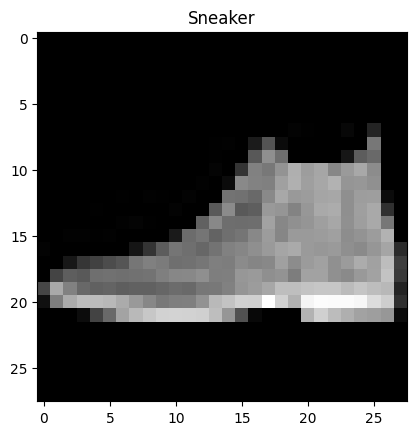

In [28]:
predictions = model.predict(test_images_nor)

print(f"Voorspelde label voor de eerste afbeelding: {class_names[train_labels[0].argmax()]}")

plt.imshow(test_images_nor[0], cmap='gray')
plt.title(class_names[train_labels[0].argmax()])
plt.show()

In [29]:
test_loss, test_acc = model.evaluate(test_images_nor, test_labels_nor)
print(f"Test nauwkeurigheid: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - accuracy: 0.8646 - loss: 0.3829
Test nauwkeurigheid: 0.8657000064849854


Testen met eigen foto

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


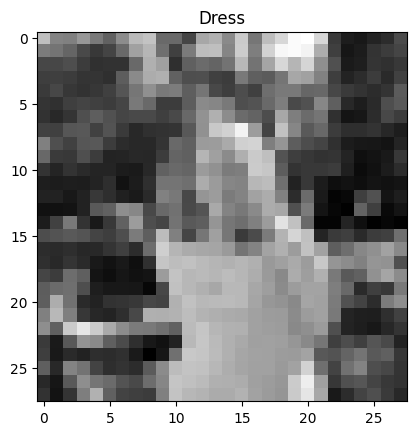

In [30]:
from PIL import Image
import numpy as np

image_path = "Picture1.jpg"
image = Image.open(image_path).convert('L')  
image = image.resize((28, 28))  
image_array = np.array(image) / 255.0  
image_array = np.expand_dims(image_array, axis=0) 

# Voorspel de klasse
prediction = model.predict(image_array)
predicted_label = prediction.argmax()

plt.imshow(image, cmap='gray')
plt.title(class_names[prediction.argmax()])
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


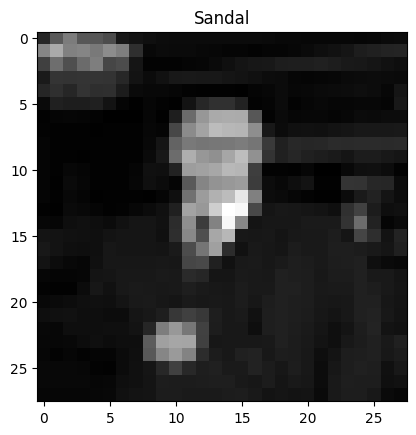

In [31]:
image_path = "Picture2.jpg"
image = Image.open(image_path).convert('L')  
image = image.resize((28, 28))  
image_array = np.array(image) / 255.0  
image_array = np.expand_dims(image_array, axis=0) 

# Voorspel de klasse
prediction = model.predict(image_array)
predicted_label = prediction.argmax()

plt.imshow(image, cmap='gray')
plt.title(class_names[prediction.argmax()])
plt.show()

Na het trainen van het model op de data van de fashion-mnist Zijn onze eigen afbeeldingen behandeld. En dit zijn nutteloze resultaten.